In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.text import Text
PATH_ROOT = "D:/Desktop/Northeastern_University/Research/Proteomics/ProteinProteinAssociation/Development"
big_df_path = f"{PATH_ROOT}/data_sources/StringDB/human/stringDB_protein_interactions_with_uniprot_id_no_na.csv"

In [2]:
big_df = pd.read_csv(big_df_path)

In [3]:
big_df.describe()

,neighborhood,neighborhood_transferred,fusion,cooccurence,homology,coexpression,coexpression_transferred,experiments,experiments_transferred,database,database_transferred,textmining,textmining_transferred,combined_score
count,12592369.0,1.259237e+07,1.259237e+07,1.259237e+07,1.259237e+07,1.259237e+07,1.259237e+07,1.259237e+07,1.259237e+07,1.259237e+07,12592369.0,1.259237e+07,1.259237e+07,1.259237e+07
mean,0.0,3.243273e+00,1.614118e-01,1.834658e+00,1.239594e+01,2.932893e+01,3.916400e+01,1.366850e+01,5.855484e+01,5.316848e+01,0.0,1.172810e+02,7.741981e+01,2.976827e+02
std,0.0,2.063439e+01,7.534408e+00,2.571924e+01,9.202592e+01,7.368065e+01,7.538059e+01,8.197997e+01,9.788137e+01,2.088978e+02,0.0,1.474647e+02,9.716266e+01,1.992880e+02
min,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.500000e+02
25%,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.770000e+02
50%,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,7.300000e+01,5.600000e+01,2.170000e+02
75%,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.200000e+01,0.000000e+00,1.240000e+02,0.000000e+00,0.0,1.870000e+02,1.150000e+02,3.190000e+02
max,0.0,3.850000e+02,9.000000e+02,4.490000e+02,9.880000e+02,9.990000e+02,9.230000e+02,9.980000e+02,8.090000e+02,9.000000e+02,0.0,9.850000e+02,6.260000e+02,9.990000e+02


In [5]:
high_confidence_df = big_df[big_df['combined_score'] >= 700]

In [5]:
def check_subscore_dist(df,colname,score_threshold,legend_location="upper right"):
    filtered_col = df[df[colname] > score_threshold][colname]
    filtered_col_stat = filtered_col.describe()
    filtered_col_stat_values = list(map(lambda x: [round(x)], filtered_col_stat.values))
    filtered_col_ax = sns.distplot(filtered_col)
    the_table = plt.table(cellText=filtered_col_stat_values,
                  colWidths = [0.2]*1,
                  rowLabels=filtered_col_stat.keys(),
                  colLabels=['Value'],
                  loc=legend_location)
    filtered_col_ax.set(xlabel=f"{colname} score (> {score_threshold})",ylabel="Ratio to Total High Confidence Interactions")
    plt.show()
    
MEDIUM_CONFIDENCE_THRESHOLD = 400
HIGH_CONFIDENCE_THRESHOLD = 700

## Check distribution of combined scores

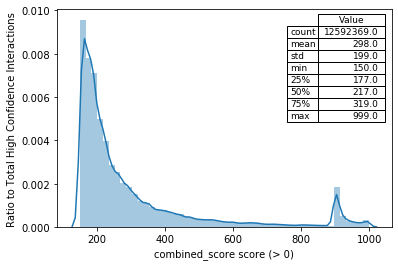

In [8]:
check_subscore_dist(big_df,"combined_score",0)

# Check distribution of sub scores

## Neighborhood Transferred

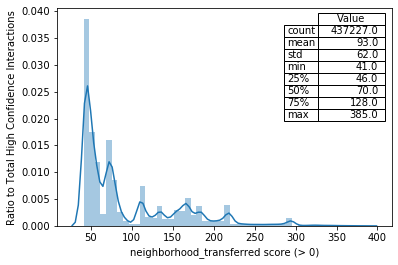

In [97]:
check_subscore_dist(big_df,"neighborhood_transferred",0)

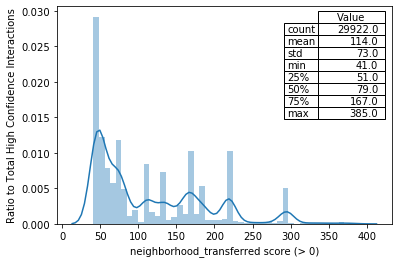

In [69]:
check_subscore_dist(high_confidence_df,"neighborhood_transferred",0)

## Fusion

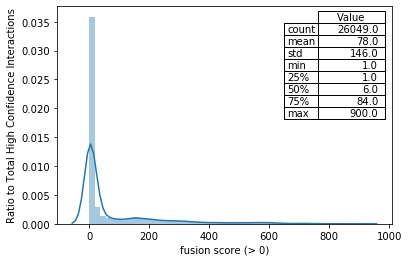

In [103]:
check_subscore_dist(big_df,"fusion",0)

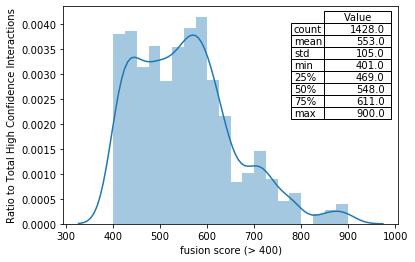

In [104]:
check_subscore_dist(big_df,"fusion",MEDIUM_CONFIDENCE_THRESHOLD)

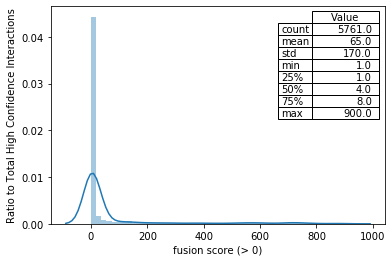

In [106]:
check_subscore_dist(high_confidence_df,"fusion",0)

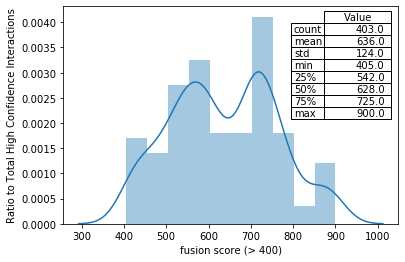

In [105]:
check_subscore_dist(high_confidence_df,"fusion",MEDIUM_CONFIDENCE_THRESHOLD)

## Co-Occurence

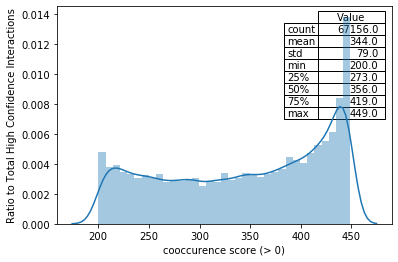

In [107]:
check_subscore_dist(big_df,"cooccurence",0,legend_location="upper center")

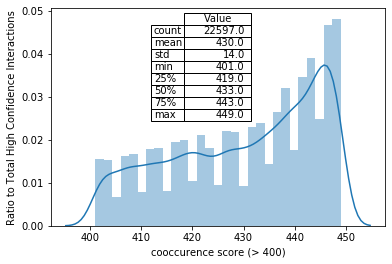

In [108]:
check_subscore_dist(big_df,"cooccurence",MEDIUM_CONFIDENCE_THRESHOLD,legend_location="upper center")

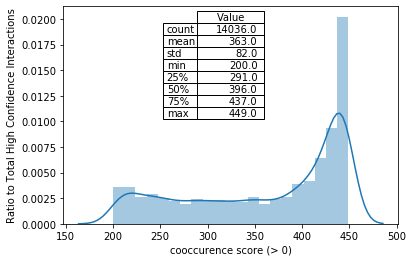

In [109]:
check_subscore_dist(high_confidence_df,"cooccurence",0,legend_location="upper center")

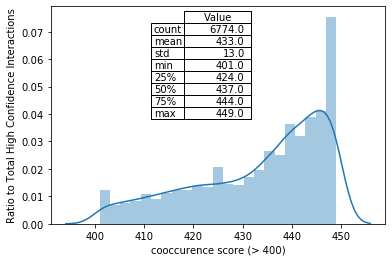

In [110]:
check_subscore_dist(high_confidence_df,"cooccurence",MEDIUM_CONFIDENCE_THRESHOLD,legend_location="upper center")

## Homology

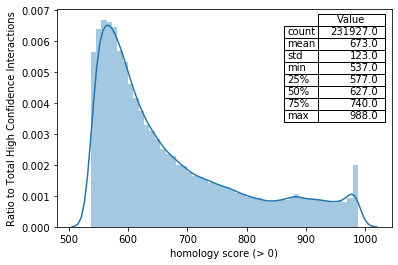

In [112]:
check_subscore_dist(big_df,"homology",0)

## Co-expression

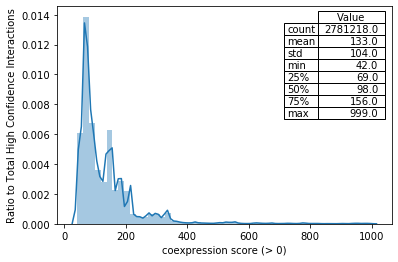

In [113]:
check_subscore_dist(big_df,"coexpression",0)

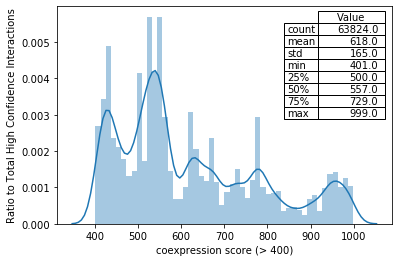

In [114]:
check_subscore_dist(big_df,"coexpression",MEDIUM_CONFIDENCE_THRESHOLD)

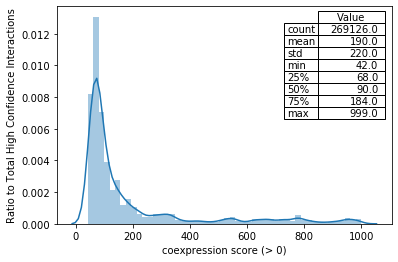

In [115]:
check_subscore_dist(high_confidence_df,"coexpression",0)

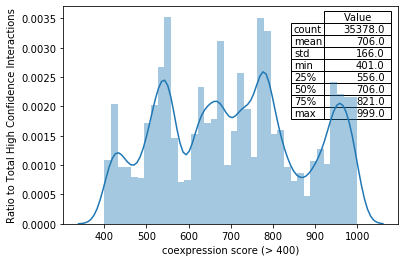

In [116]:
check_subscore_dist(high_confidence_df,"coexpression",MEDIUM_CONFIDENCE_THRESHOLD)

## Co-expression transferred

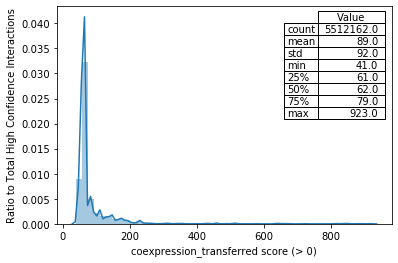

In [117]:
check_subscore_dist(big_df,"coexpression_transferred",0)

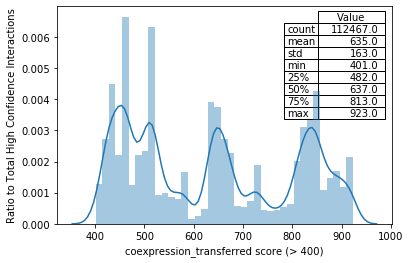

In [118]:
check_subscore_dist(big_df,"coexpression_transferred",MEDIUM_CONFIDENCE_THRESHOLD)

## Experiments

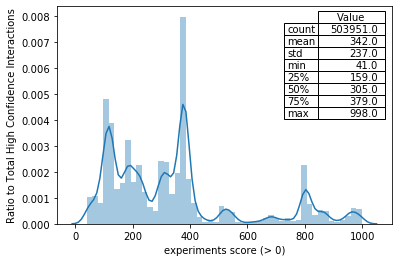

In [119]:
check_subscore_dist(big_df,"experiments",0)

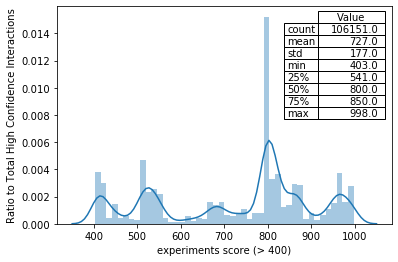

In [120]:
check_subscore_dist(big_df,"experiments",MEDIUM_CONFIDENCE_THRESHOLD)

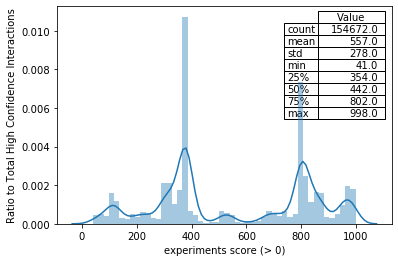

In [121]:
check_subscore_dist(high_confidence_df,"experiments",0)

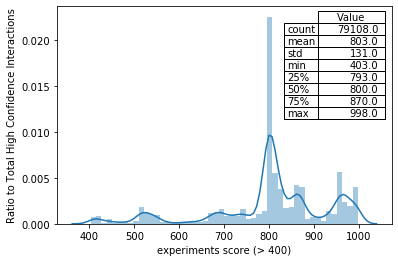

In [122]:
check_subscore_dist(high_confidence_df,"experiments",MEDIUM_CONFIDENCE_THRESHOLD)

## Experiments Transferred

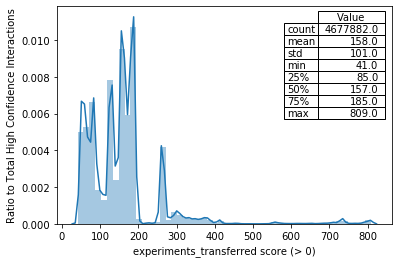

In [123]:
check_subscore_dist(big_df,"experiments_transferred",0)

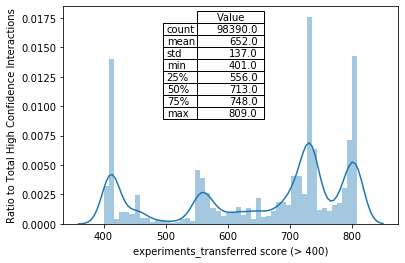

In [125]:
check_subscore_dist(big_df,"experiments_transferred",MEDIUM_CONFIDENCE_THRESHOLD,"upper center")

## Others

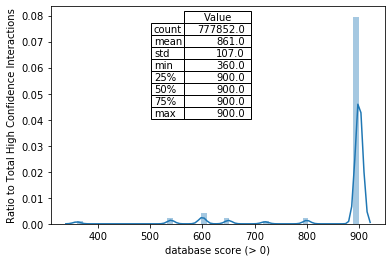

In [9]:
check_subscore_dist(big_df,"database",0,"upper center")

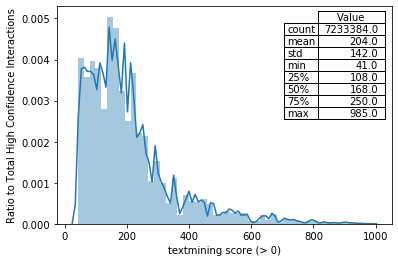

In [10]:
check_subscore_dist(big_df,"textmining",0)

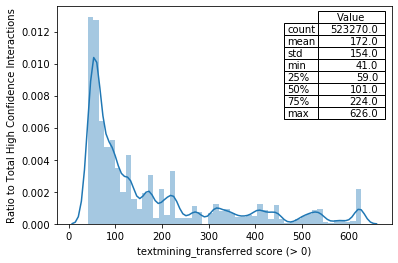

In [79]:
check_subscore_dist(big_df,"textmining_transferred",0)

# Write to json

In [15]:
import json

def write_json_to(json_dict,path):
  json_to_write = json.dumps(json_dict)
  write_file = open(path,"w")
  write_file.write(json_to_write)
  write_file.close()

def read_json_from(path):
  with open(path, "r") as read_file:
    return json.load(read_file)

def df_to_json(df,colname):
    json_to_write = {}
    json_to_write['relation_type'] = colname
    for idx,row in df.iterrows():
        p1 = row['protein1_uniprot']
        p2 = row['protein2_uniprot']
        if p1 not in json_to_write:
            json_to_write[p1] = {}
        if p2 not in json_to_write:
            json_to_write[p2] = {}
        json_to_write[p1][p2] = row[colname]
        json_to_write[p2][p1] = row[colname]
    return json_to_write

In [11]:
medium_confidence_df = big_df[big_df['database'] >= MEDIUM_CONFIDENCE_THRESHOLD]

In [16]:
json_to_write = df_to_json(medium_confidence_df,"database")

In [148]:
json_to_write

{'P84085': {'Q9BYZ2': 403,
  'P07864': 403,
  'Q96EP5': 419,
  'P61020': 465,
  'P00338': 423,
  'P51649': 403,
  'Q6ZMR3': 410,
  'Q96CS3': 416,
  'P13804': 729,
  'Q15366': 410,
  'Q9Y617': 403,
  'Q99459': 980,
  'P84077': 862},
 'Q9BYZ2': {'P84085': 403,
  'P60174': 419,
  'Q00796': 873,
  'P37837': 416,
  'P51148': 410,
  'P84077': 416,
  'O75083': 416,
  'P80404': 413,
  'P40925': 406,
  'P30038': 410,
  'P18085': 410},
 'P07864': {'P84085': 403,
  'P60174': 419,
  'Q8N336': 416,
  'P18085': 410,
  'Q9H0U4': 419,
  'P61088': 410,
  'P37837': 416,
  'P22392': 416,
  'P07195': 912,
  'O75083': 416,
  'P00338': 912,
  'P40925': 406,
  'P84077': 514},
 'Q96EP5': {'P84085': 419,
  'Q9NR45': 869,
  'P07737': 403,
  'O60493': 734,
  'P55263': 825,
  'O75874': 419,
  'Q12888': 673,
  'O43715': 403,
  'Q96I24': 419,
  'Q01085': 419,
  'P50454': 413,
  'P63167': 734,
  'P63000': 416,
  'Q9Y2V2': 413,
  'Q9NTZ6': 806,
  'P40121': 588,
  'P15559': 410,
  'P31483': 416,
  'Q15404': 419,
  'Q9

In [17]:
json_path = f"{PATH_ROOT}/data_sources/StringDB/human/medium_confidence_database_relation_lookup.json"
write_json_to(json_to_write,json_path)

In [ ]:
huge_json = {}
colnames = list(big_df.columns)[4:]
for idx,row in big_df.iterrows():
    p1 = row['protein1_uniprot']
    p2 = row['protein2_uniprot']
    if p1 not in huge_json:
        huge_json[p1] = {}
    if p2 not in huge_json:
        huge_json[p2] = {}
    huge_json[p1][p2] = {}
    huge_json[p2][p1] = {}
    for name in colnames:
        huge_json[p1][p2][name] = row[name]
        huge_json[p2][p1][name] = row[name]
huge_json_write_path = f"{PATH_ROOT}/data_sources/StringDB/human/proteins_relations_score_lookup.json"
write_json_to(huge_json,huge_json_write_path)